# Clustering 
1. Hierarchical clustering
2. K-means clustering
3. DBScanner clustering

#### Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.cluster import MeanShift, DBSCAN, estimate_bandwidth 
from sklearn.neighbors import NearestNeighbors 
from sklearn.mixture import GaussianMixture 
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy.spatial.distance import pdist, squareform
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv('Processed_Data.csv')

In [3]:
df.head(5)

,vendor_count,is_chain,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,...,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,engagement_duration,tot_value_cui,preferred_order_day,preferred_order_hour,age_category
0,2.0,1.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,28.88,0,18,26
1,2.0,2.0,12.82,6.39,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,19.21,0,10,16
2,1.0,2.0,9.20,0.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,9.20,0,9,42
3,2.0,1.0,0.00,13.70,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,31.56,1,11,26
4,2.0,0.0,14.57,40.87,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,55.44,1,8,26


In [4]:
cluster_features = ['vendor_count', 'is_chain', 
                                       'CUI_American', 'CUI_Asian', 'CUI_Beverages', 'CUI_Cafe',
                                       'CUI_Chicken Dishes', 'CUI_Chinese', 'CUI_Desserts', 
                                       'CUI_Healthy', 'CUI_Indian', 'CUI_Italian', 'CUI_Japanese', 
                                       'CUI_Noodle Dishes', 'CUI_OTHER', 'CUI_Street Food / Snacks', 
                                       'CUI_Thai', 'engagement_duration', 'tot_value_cui', 
                                       'preferred_order_day', 'preferred_order_hour', 
                                       'age_category']

print('cluster_features', cluster_features)

cluster_features ['vendor_count', 'is_chain', 'CUI_American', 'CUI_Asian', 'CUI_Beverages', 'CUI_Cafe', 'CUI_Chicken Dishes', 'CUI_Chinese', 'CUI_Desserts', 'CUI_Healthy', 'CUI_Indian', 'CUI_Italian', 'CUI_Japanese', 'CUI_Noodle Dishes', 'CUI_OTHER', 'CUI_Street Food / Snacks', 'CUI_Thai', 'engagement_duration', 'tot_value_cui', 'preferred_order_day', 'preferred_order_hour', 'age_category']


In [5]:
print(df[cluster_features].dtypes)

vendor_count                float64
is_chain                    float64
CUI_American                float64
CUI_Asian                   float64
CUI_Beverages               float64
CUI_Cafe                    float64
CUI_Chicken Dishes          float64
CUI_Chinese                 float64
CUI_Desserts                float64
CUI_Healthy                 float64
CUI_Indian                  float64
CUI_Italian                 float64
CUI_Japanese                float64
CUI_Noodle Dishes           float64
CUI_OTHER                   float64
CUI_Street Food / Snacks    float64
CUI_Thai                    float64
engagement_duration         float64
tot_value_cui               float64
preferred_order_day           int64
preferred_order_hour          int64
age_category                  int64
dtype: object


With this we can confirm that all features features are numeric (`float64` and `int64`)

In [6]:
print(df.shape)  

(31875, 22)


In [7]:
print(cluster_features) 

['vendor_count', 'is_chain', 'CUI_American', 'CUI_Asian', 'CUI_Beverages', 'CUI_Cafe', 'CUI_Chicken Dishes', 'CUI_Chinese', 'CUI_Desserts', 'CUI_Healthy', 'CUI_Indian', 'CUI_Italian', 'CUI_Japanese', 'CUI_Noodle Dishes', 'CUI_OTHER', 'CUI_Street Food / Snacks', 'CUI_Thai', 'engagement_duration', 'tot_value_cui', 'preferred_order_day', 'preferred_order_hour', 'age_category']


## 1. Hierarchical Clustering 

Linkage Matrix

In [8]:
linkage_matrix = linkage(df[cluster_features].to_numpy(), method='ward')

Dendrogram

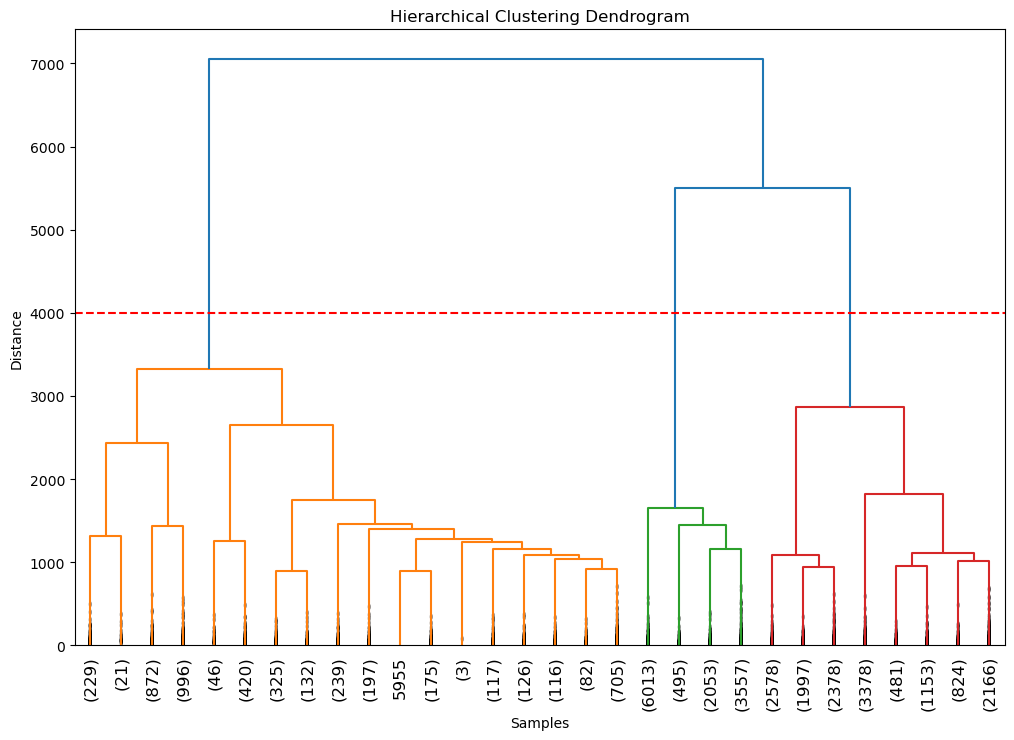

In [9]:
plt.figure(figsize=(12, 8))
dendrogram(
    linkage_matrix,
    truncate_mode='lastp',  
    p=30, 
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True)

plt.axhline(y=4000, color='r', linestyle='--') 

plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()

Number of clusters

In [10]:
cluster_labels = fcluster(linkage_matrix, t=4000, criterion='distance')

In [11]:
df['Cluster'] = cluster_labels
print(df['Cluster'].value_counts())

Cluster
3    14955
2    12118
1     4802
Name: count, dtype: int64


##### 1. Dendrogram
The dendrogram was generated using the **Ward's Linkage** method, which minimizes the variation within clusters. 
- The red line represents the **cut-off height** defined at `t=4000`.
- This line determines the number of clusters by "cutting" the dendrogram.
- The branches below the red line correspond to the formed clusters.

##### 2. Clusters
**4 clusters** were identified, with the following sizes:

| Cluster | Number of Samples |
|---------|--------------------|
| 1       | 3132                |
| 2       | 926             |
| 3       | 10836             |
| 4       | 16981             |


### Cluster Analysis: 
The following variables were analyzed across clusters:
- `vendor_count`
- `is_chain`
- `first_order`
- `last_order`
- `engagement_duration`
- `tot_value_cui`
- `preferred_order_day`
- `preferred_order_hour`
- `age_category`

This analysis focuses on identifying patterns and differences in these variables among the clusters.

In [12]:
# Grouping data by cluster and calculating statistics
cluster_summary = df.groupby('Cluster').agg({
    'vendor_count': 'mean',
    'is_chain': 'mean',
    'engagement_duration': 'mean',
    'tot_value_cui': 'mean',
    'preferred_order_day': lambda x: x.mode()[0],  # Mode
    'preferred_order_hour': lambda x: x.mode()[0],  # Mode
    'age_category': lambda x: x.mode()[0],  # Mode
    'CUI_American': 'mean',
    'CUI_Asian': 'mean',
    'CUI_Italian': 'mean'
})

# Showing clusters resume
print("Cluster Resume:")
print(cluster_summary)


Cluster Resume:
         vendor_count  is_chain  engagement_duration  tot_value_cui  \
Cluster                                                               
1            5.374531  3.681799            63.487922      82.898696   
2            1.483702  1.033669             4.959069      17.790049   
3            3.315446  2.766232            50.828017      29.509628   

         preferred_order_day  preferred_order_hour  age_category  \
Cluster                                                            
1                          0                    10            26   
2                          0                    11            26   
3                          0                    11            26   

         CUI_American  CUI_Asian  CUI_Italian  
Cluster                                        
1           12.764219  38.876468     9.228159  
2            2.262264   4.534356     1.211027  
3            4.463591   5.061402     2.950060  


In [13]:
# Grouping data per hierarchical cluster and calculating the mean of each variable
hierarchical_cluster_analysis = df.groupby('Cluster')[[
    'vendor_count', 'is_chain', 'engagement_duration', 'tot_value_cui',
    'preferred_order_day', 'preferred_order_hour', 'age_category'
]].mean()

# Showing temporarily every column in the terminal
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print("Cluster Analysis for Hierarchical Clustering:")
    print(hierarchical_cluster_analysis)


Cluster Analysis for Hierarchical Clustering:
         vendor_count  is_chain  engagement_duration  tot_value_cui  \
Cluster                                                               
1            5.374531  3.681799            63.487922      82.898696   
2            1.483702  1.033669             4.959069      17.790049   
3            3.315446  2.766232            50.828017      29.509628   

         preferred_order_day  preferred_order_hour  age_category  
Cluster                                                           
1                   2.636401             10.076843     28.712620  
2                   2.910546             11.599274     28.529790  
3                   2.492076             11.849081     28.900301  


The following cuisine-related variables were analyzed across clusters:
- `CUI_American`
- `CUI_Asian`
- `CUI_Beverages`
- `CUI_Cafe`
- `CUI_Chicken Dishes`
- `CUI_Chinese`
- `CUI_Healthy`
- `CUI_Indian`
- `CUI_Italian`
- `CUI_Japanese`
- `CUI_Noodle Dishes`
- `CUI_OTHER`
- `CUI_Street Food / Snacks`
- `CUI_Thai`

In [14]:
# Grouping data per hierarchical cluster and calculating the mean of each variable
hierarchical_cluster_analysis = df.groupby('Cluster')[[
    'CUI_American', 'CUI_Asian', 'CUI_Beverages',
    'CUI_Cafe', 'CUI_Chicken Dishes', 'CUI_Chinese', 'CUI_Desserts', 'CUI_Healthy',
    'CUI_Indian', 'CUI_Italian', 'CUI_Japanese', 'CUI_Noodle Dishes', 'CUI_OTHER',
    'CUI_Street Food / Snacks', 'CUI_Thai'
]].mean()

# Showing temporarily every column in the terminal
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print("Cluster Analysis for Hierarchical Clustering:")
    print(hierarchical_cluster_analysis)


Cluster Analysis for Hierarchical Clustering:
         CUI_American  CUI_Asian  CUI_Beverages  CUI_Cafe  CUI_Chicken Dishes  \
Cluster                                                                         
1           12.764219  38.876468       6.198367  3.078609            1.243609   
2            2.262264   4.534356       1.356222  0.161871            0.273573   
3            4.463591   5.061402       1.809204  0.588596            1.016789   

         CUI_Chinese  CUI_Desserts  CUI_Healthy  CUI_Indian  CUI_Italian  \
Cluster                                                                    
1           3.875023      2.702439     2.734077    3.499633     9.228159   
2           0.590311      0.542096     0.381049    0.843106     1.211027   
3           1.329149      0.578683     0.839417    1.671160     2.950060   

         CUI_Japanese  CUI_Noodle Dishes  CUI_OTHER  CUI_Street Food / Snacks  \
Cluster                                                                         
1    

### **Cluster Analysis Summary**

| **Cluster** | **Vendor Count** | **Is Chain** | **Engagement Duration** | **Total Value** | **Preferred Order Day** | **Preferred Order Hour** | **Age Category** | **Top Cuisines**                                                                                                           | **Conclusion**                                                                                                                                                                       |
|-------------|------------------|--------------|--------------------------|------------------|--------------------------|--------------------------|------------------|---------------------------------------------------------------------------------------------------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| 1           | 5.37             | 3.68         | 63.49                   | 82.90            | 2.64                    | 10.08                   | 28.71            | Asian (38.88), American (12.76), Street Food (13.74), Japanese (8.29), Italian (9.22)                                      | High-value customers with frequent engagement and moderate chain interactions. They prefer diverse cuisines and morning orders.                                                    |
| 2           | 1.48             | 1.03         | 4.96                    | 17.79            | 2.91                    | 11.59                   | 28.52            | Asian (4.53), American (2.26), Street Food (2.43), Italian (1.21), Japanese (1.69)                                         | Low-spending, low-engagement customers with limited chain preferences. They order later in the morning and show moderate interest in diverse cuisines.                             |
| 3           | 3.31             | 2.77         | 50.83                   | 29.51            | 2.49                    | 11.85                   | 28.90            | Asian (5.06), American (4.46), Italian (2.95), Street Food (1.95), Japanese (2.36), Healthy (0.83)                         | Mid-value customers with steady engagement. They have diverse tastes but lean toward Asian and American cuisines. Ideal for promotions and loyalty programs to boost engagement. |



## 2. K-Means 

In [15]:
# Use cluster_features to select relevant columns from your DataFrame
X = df[cluster_features]  # Select only the specified features

In [16]:
# Define the range of clusters to evaluate
range_clusters = range(2, 11)  # k from 2 to 10

# Store silhouette scores
silhouette_scores = []

for k in range_clusters:
    # Initialize and fit K-Means
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=15, random_state=1)
    cluster_labels = kmeans.fit_predict(X)  # Use selected features from cluster_features
    
    # Compute silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    
    print(f"For n_clusters = {k}, the silhouette score is {silhouette_avg:.3f}")


For n_clusters = 2, the silhouette score is 0.357
For n_clusters = 3, the silhouette score is 0.309
For n_clusters = 4, the silhouette score is 0.309
For n_clusters = 5, the silhouette score is 0.317
For n_clusters = 6, the silhouette score is 0.322
For n_clusters = 7, the silhouette score is 0.225
For n_clusters = 8, the silhouette score is 0.225
For n_clusters = 9, the silhouette score is 0.227
For n_clusters = 10, the silhouette score is 0.213


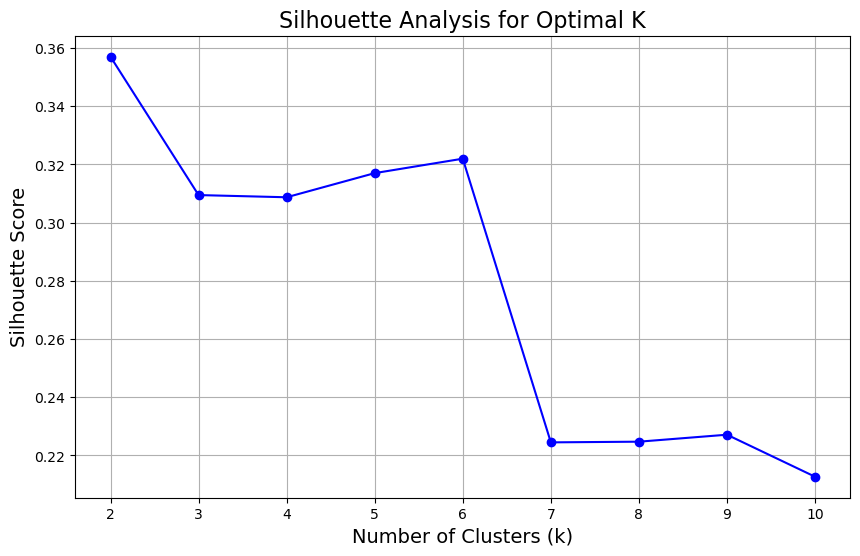

In [17]:
# Plot the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range_clusters, silhouette_scores, marker='o', linestyle='-', color='b')
plt.title("Silhouette Analysis for Optimal K", fontsize=16)
plt.xlabel("Number of Clusters (k)", fontsize=14)
plt.ylabel("Silhouette Score", fontsize=14)
plt.xticks(range_clusters)
plt.grid(True)
plt.show()


In [18]:
# Perform K-Means with the optimal number of clusters
optimal_k = 2
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', n_init=15, random_state=1)
cluster_labels = kmeans.fit_predict(df[cluster_features])

# Add the cluster labels to your original DataFrame
df['Cluster'] = cluster_labels

# Inspect the number of observations in each cluster
print(df['Cluster'].value_counts())

Cluster
1    19923
0    11952
Name: count, dtype: int64


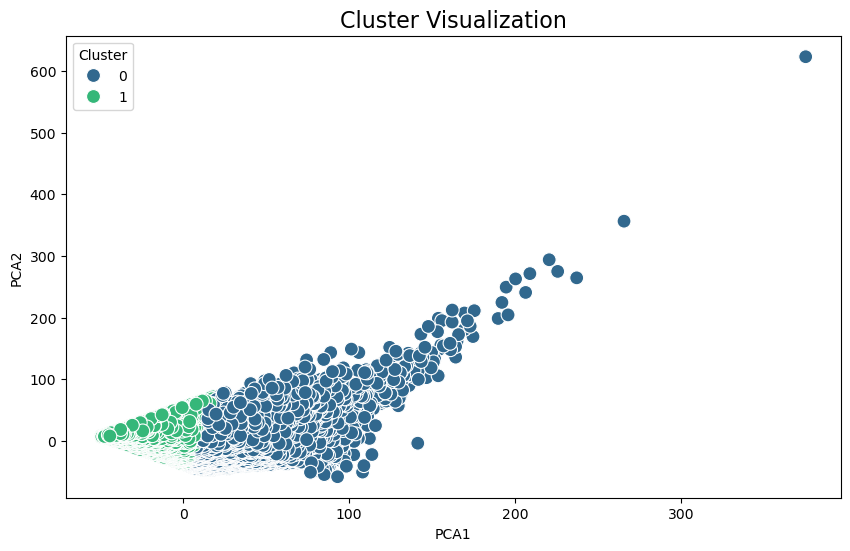

In [19]:
# Reduce to 2 dimensions
pca = PCA(n_components=2, random_state=1)
df['PCA1'] = pca.fit_transform(df[cluster_features])[:, 0]
df['PCA2'] = pca.fit_transform(df[cluster_features])[:, 1]

# Plot clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df, palette='viridis', s=100)
plt.title("Cluster Visualization", fontsize=16)
plt.show()

In [20]:
# Group by the cluster labels and compute the mean of each feature
cluster_analysis = df.groupby('Cluster')[cluster_features].mean()
# Temporarily show all rows and columns
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(cluster_analysis)


         vendor_count  is_chain  CUI_American  CUI_Asian  CUI_Beverages  \
Cluster                                                                   
0            4.635542   3.50753      8.914792  19.674642       3.977754   
1            1.905662   1.48838      2.455017   4.124583       1.290658   

         CUI_Cafe  CUI_Chicken Dishes  CUI_Chinese  CUI_Desserts  CUI_Healthy  \
Cluster                                                                         
0        1.725457            1.235970     2.736434      1.573177     1.782078   
1        0.247193            0.487915     0.649140      0.471707     0.451773   

         CUI_Indian  CUI_Italian  CUI_Japanese  CUI_Noodle Dishes  CUI_OTHER  \
Cluster                                                                        
0          2.839882     5.722915      5.435807           1.211878   5.519987   
1          0.907089     1.742043      1.532386           0.412064   1.490054   

         CUI_Street Food / Snacks  CUI_Thai  engageme

| **Cluster** | **Vendor Count** | **Is Chain** | **Engagement Duration** | **Total Value** | **Preferred Order Day** | **Preferred Order Hour** | **Age Category** | **Top Cuisines** | **Conclusion** |
|-------------|------------------|--------------|------------------------|-----------------|------------------------|------------------------|------------------|-----------------|----------------|
| **0** | 7.28 | 7.35 | 68.96 | 136.66 | 2.66 | 10.25 | 28.85 | Asian (42.93), Street Food (17.96), American (15.44) | High-value customers who frequently engage with chain restaurants. They prefer early morning orders and have a strong preference for Asian cuisine and street food. |
| **1** | 2.57 | 2.24 | 31.03 | 25.82 | 2.67 | 11.64 | 28.72 | Asian (5.77), American (3.54), Italian (2.46) | Lower-value customers with less engagement and fewer chain interactions. They tend to order later in the morning and have more moderate cuisine preferences. |

## 3. GMM (Gaussian Mixture Model )

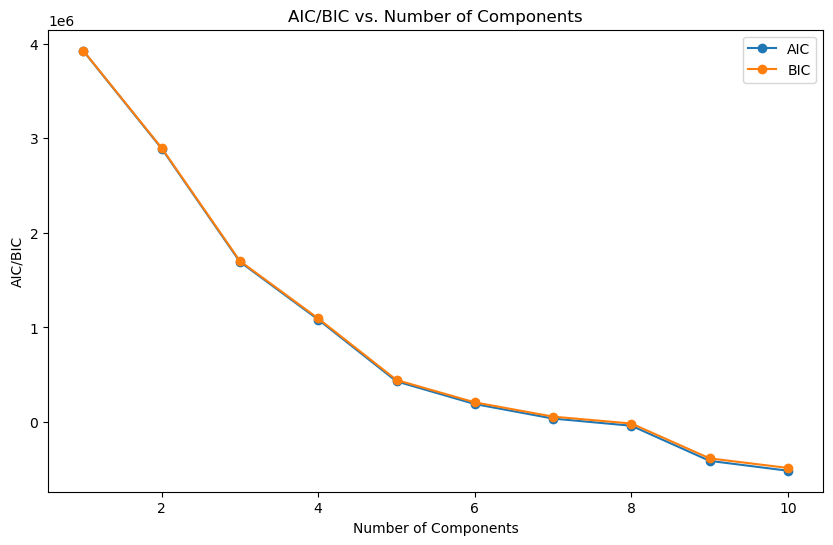

In [21]:
# List to store the AIC and BIC values
aic_values = []
bic_values = []

# Try a range of component numbers (e.g., 1 to 10)
for n_components in range(1, 11):
    gmm = GaussianMixture(n_components=n_components, random_state=42)
    gmm.fit(df)  # Use the entire dataset or scaled data
    aic_values.append(gmm.aic(df))  # Add the AIC value
    bic_values.append(gmm.bic(df))  # Add the BIC value

# Plot the AIC and BIC values
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), aic_values, label="AIC", marker='o')
plt.plot(range(1, 11), bic_values, label="BIC", marker='o')
plt.xlabel('Number of Components')
plt.ylabel('AIC/BIC')
plt.title('AIC/BIC vs. Number of Components')
plt.legend()
plt.show()


In [28]:
gmm = GaussianMixture(n_components=5, covariance_type='full', n_init=10, init_params='kmeans', random_state=1)
gmm_labels = gmm.fit_predict(df)
labels_proba = gmm.predict_proba(df)

In [29]:
gmm.weights_

array([0.19349594, 0.53888572, 0.05412176, 0.1482374 , 0.06525917])

In [30]:
print(f"Cluster assignments: {np.unique(gmm_labels)}")
print(f"Number of data points per cluster: {np.bincount(gmm_labels)}")


Cluster assignments: [0 1 2 3 4]
Number of data points per cluster: [ 6170 17177  1725  4725  2078]


**2 clusters** were identified, with the following sizes:

| Cluster | Number of Samples |
|---------|--------------------|
| 0       | 7827                |
| 1       | 24048             |

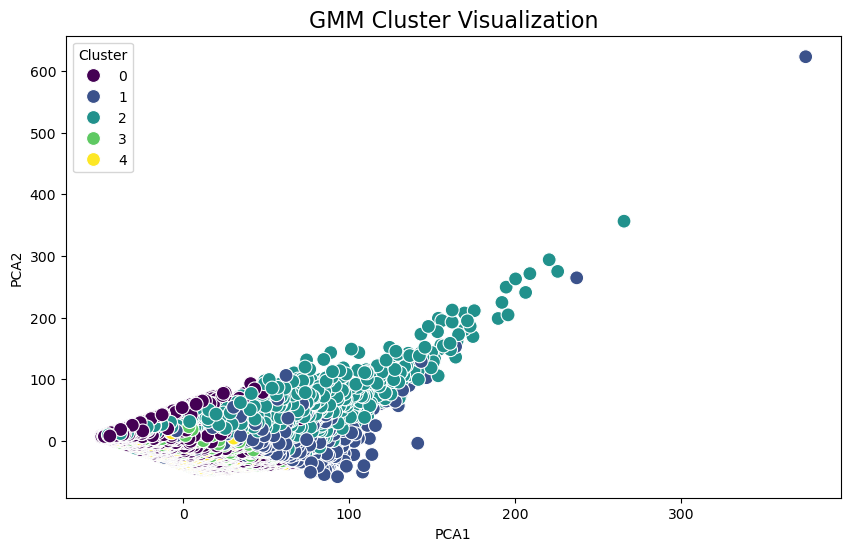

In [31]:
df['Cluster'] = gmm.fit_predict(df[cluster_features])

# Reduce to 2 dimensions using PCA
pca = PCA(n_components=2, random_state=1)
df['PCA1'] = pca.fit_transform(df[cluster_features])[:, 0]
df['PCA2'] = pca.fit_transform(df[cluster_features])[:, 1]

# Plot clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df, palette='viridis', s=100)
plt.title("GMM Cluster Visualization", fontsize=16)
plt.show()


In [32]:
# Group by the GMM cluster labels and compute the mean for each feature
cluster_analysis = df.assign(Cluster=gmm_labels).groupby('Cluster')[cluster_features].mean()

# Temporarily show all rows and columns
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(cluster_analysis)


         vendor_count  is_chain  CUI_American  CUI_Asian  CUI_Beverages  \
Cluster                                                                   
0            2.638088  1.888655      2.768167   7.388859       2.142802   
1            2.062729  1.607731      4.406305   7.889475       1.815950   
2            5.882029  3.759420     16.708620  62.134145       9.377994   
3            4.028571  3.425820      2.686986   2.096167       1.307716   
4            6.006015  4.636189     10.190486   9.207324       3.121386   

         CUI_Cafe  CUI_Chicken Dishes  CUI_Chinese  CUI_Desserts  CUI_Healthy  \
Cluster                                                                         
0        0.924614            0.000000     2.753297      2.531413     2.233039   
1        0.000000            0.514508     0.000000      0.000000     0.000000   
2        0.005264            0.000000     3.112586      5.536186     3.372765   
3        0.000000            2.009672     2.459831      0.000000     

### **Cluster Analysis Summary**

| **Cluster** | **Vendor Count** | **Is Chain** | **Engagement Duration** | **Total Value** | **Preferred Order Day** | **Preferred Order Hour** | **Age Category** | **Top Cuisines**                                          | **Conclusion**                                                                                                                                       |
|-------------|------------------|--------------|--------------------------|------------------|--------------------------|---------------------------|------------------|-----------------------------------------------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------|
| **0**       | 5.09             | 5.47         | 50.60                   | 62.02            | 2.61                     | 11.48                     | 28.73           | Asian (11.23), American (5.66), Other (5.99)              | Moderately engaged customers with average spending. They show a preference for Asian, American, and other cuisines, with late-morning orders.         |
| **1**       | 2.45             | 1.96         | 30.32                   | 30.57            | 2.69                     | 11.49                     | 28.73           | Asian (9.54), American (4.62), Italian (3.00)             | Lower-spending, less engaged customers. They prefer Asian, American, and Italian cuisines and tend to order during late-morning hours.                |
